<a href="https://colab.research.google.com/github/gpasxos/large-scale-optimization/blob/main/ch02_portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

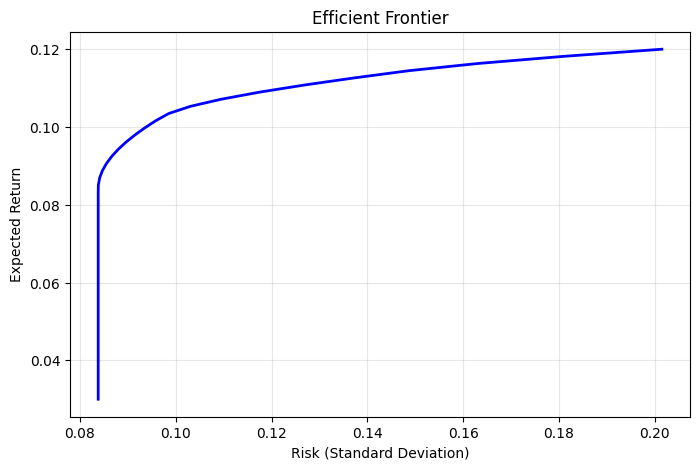

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Problem data
np.random.seed(42)
n = 5 # Number of assets
mu = np.array([0.12, 0.10, 0.07, 0.05, 0.03]) # Expected returns

# Generate random positive semidefinite covariance matrix
A = np.random.randn(n, n) * 0.1
Sigma = A @ A.T + 0.01 * np.eye(n)

budget = 1.0 # Normalized budget

# Solve for different target returns to trace efficient frontier
target_returns = np.linspace(0.03, 0.12, 50)
risks = []
portfolios = []

for r in target_returns:
    x = cp.Variable(n)
    objective = cp.Minimize(cp.quad_form(x, Sigma))
    constraints = [
        x @ mu >= r,          # Minimum return
        cp.sum(x) == budget,  # Budget constraint
        x >= 0                # No short-selling
    ]
    problem = cp.Problem(objective, constraints)
    problem.solve()

    if problem.status == 'optimal':
        risks.append(np.sqrt(problem.value)) # Standard deviation
        portfolios.append(x.value)
    else:
        risks.append(np.nan)
        portfolios.append(None)

# Plot efficient frontier
plt.figure(figsize=(8, 5))
plt.plot(risks, target_returns, 'b-', linewidth=2)
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.grid(True, alpha=0.3)
plt.savefig('efficient_frontier.pdf', bbox_inches='tight')
plt.show()